In [617]:
using LinearAlgebra
using Distributions
using Plots

# 3.1

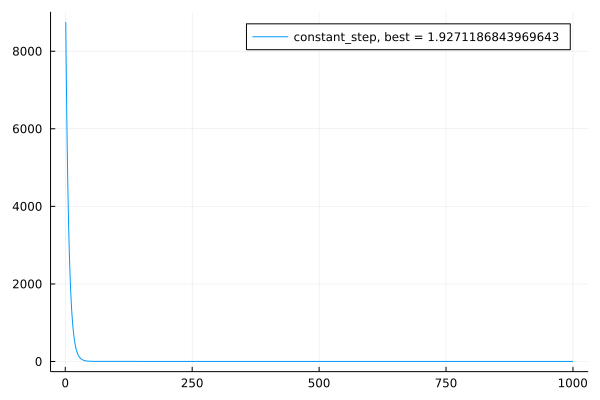

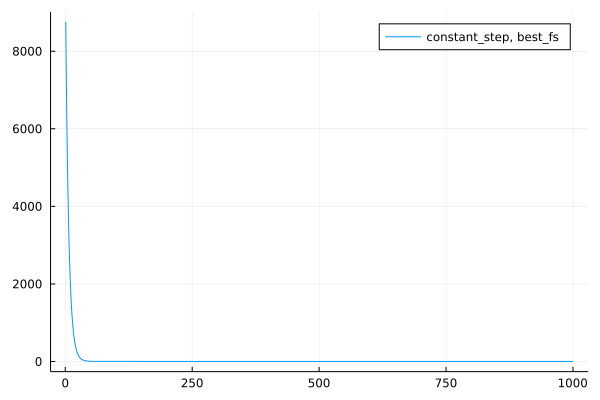

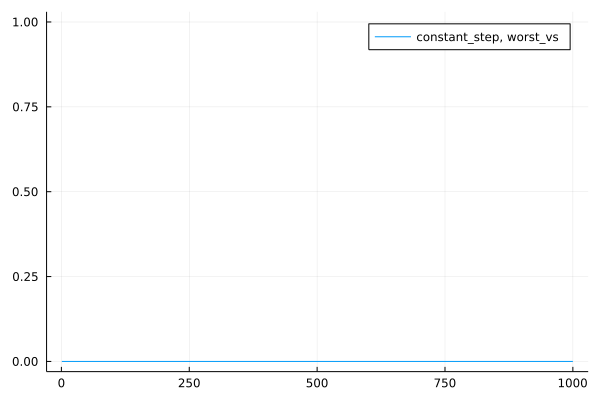

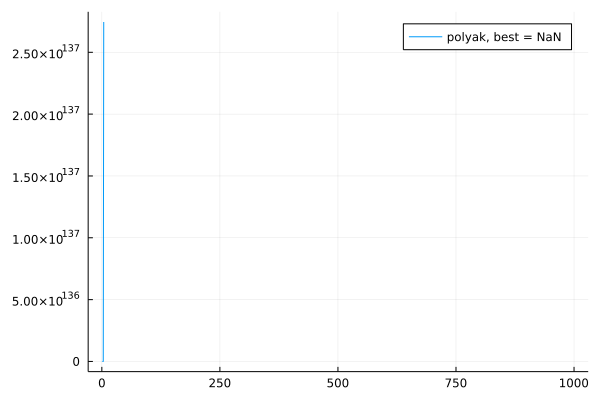

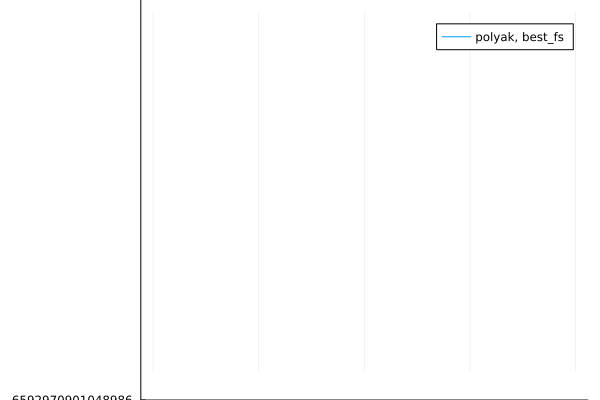

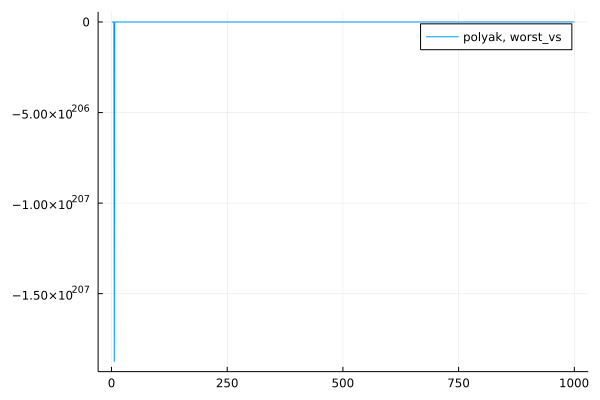

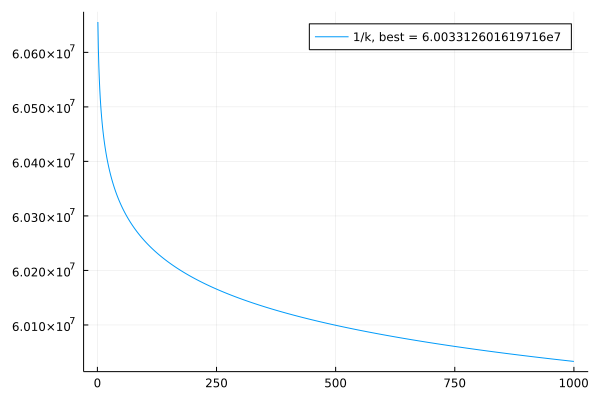

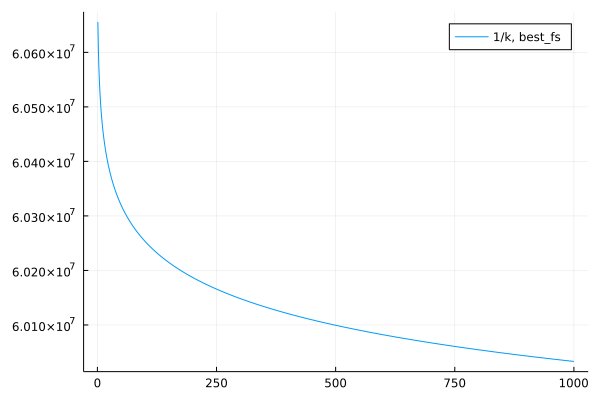

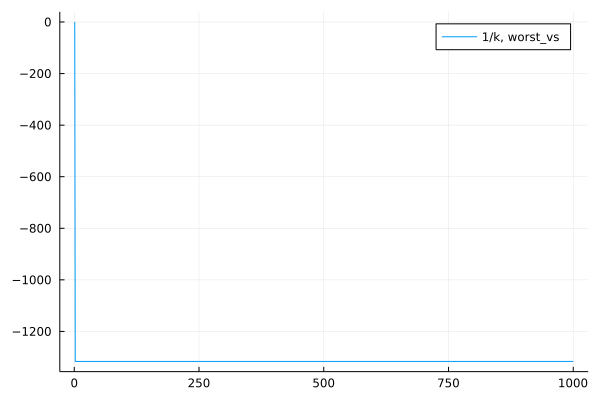

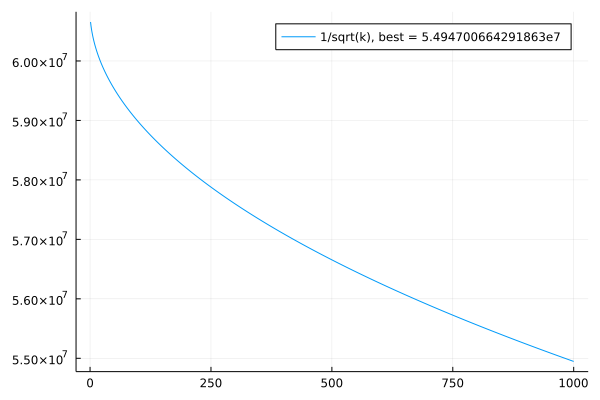

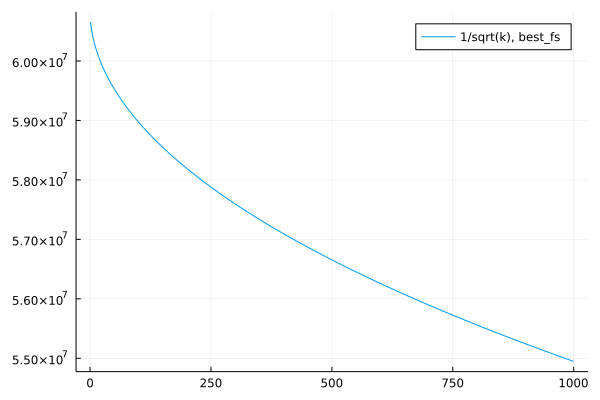

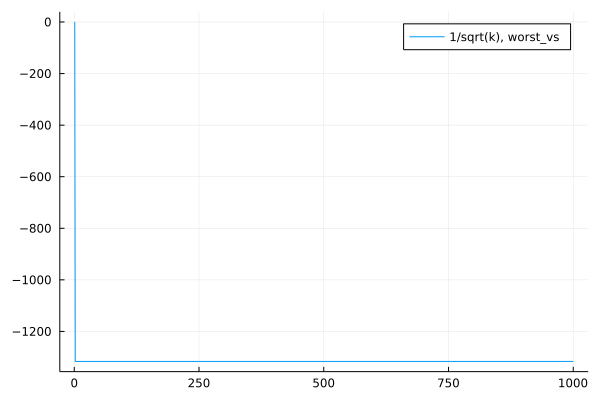

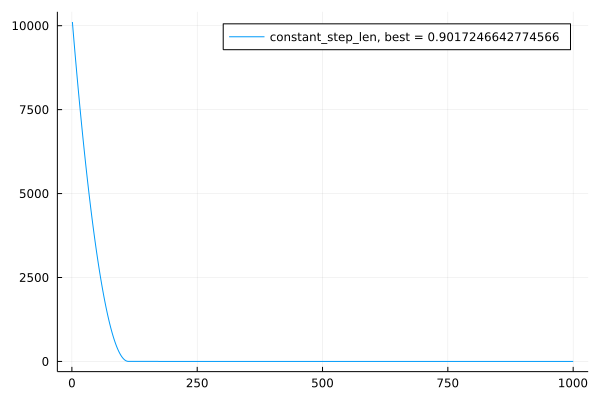

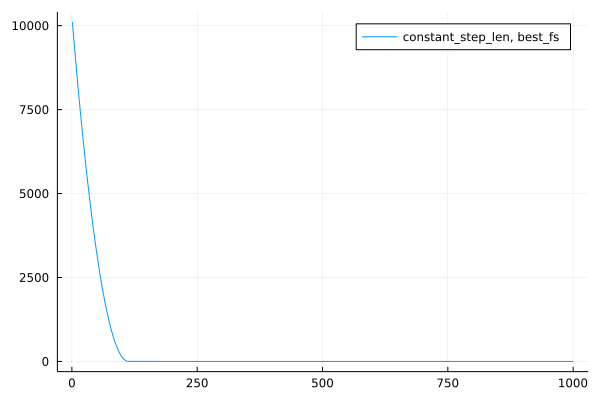

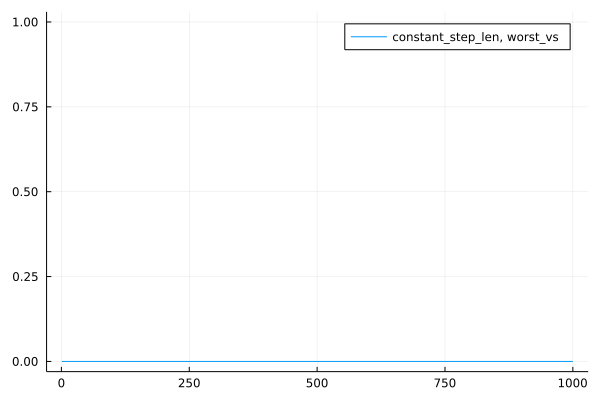

0.8383952238644192


In [713]:
m, n = 10, 100
J = 3
λ = .5
num_iters = 1000

As = [rand(m, n)/sqrt(m) for _ in 1:J]
xs = [rand(n)/sqrt(n) for _ in 1:J]
b = sum(As[j]*xs[j] for j in 1:J)


g(xs_, i) = -As[i]'*b + sum(As[i]'*As[j]*xs_[j] for j in 1:J) + λ.*xs_[i]/norm(xs_[i])
# g(xs_, 3)
f(xs_) = 1/2 * norm(b - sum(As[j]*xs_[j] for j in 1:J)).^2 + λ.*sum(norm(xs_[j]) for j = 1:J)
# f(xs_)


f_star = f(xs)
println(f_star)

steps = Dict(
    "constant_step"=> params -> 1e-3,
    "constant_step_len" => params -> params["γ"]/sum(norm(g) for g in params["∂"]),
    "1/sqrt(k)" => params -> 1/sqrt(params["k"]),
    "1/k" => params -> 1/params["k"],
    "polyak" => params -> params["f(x)"]-f_star/(sum(norm(g) for g in params["∂"])^2)
)
# α(params) = 1e-3

for (key, α) in steps
    xs_ = [ones(n) for _ in 1:J]
    worst_vs = []
    best_fs = []
    fs = []

    for i = 1:num_iters
        vs = [(j,k,(As[j]*xs_[j])[k]) for (j,k) in Iterators.product(1:J, 1:m) if (As[j]*xs_[j])[k] < 0]
        if length(vs) > 0
            worst_v = minimum(v -> v[3], vs)
            v = vs[1]
            gs = [j == v[1] ? -As[v[1]][v[2], :] : zeros(n) for j = 1:J]
        else
            worst_v = 0
            gs = [g(xs_, j) for j in 1:J]
        end

        params = Dict("γ"=>1/4,"∂"=>gs,"k"=>i,"f(x)"=>f(xs_))
#         [println("length = $(length(gs[i]))") for i = 1:J]
        [xs_[j] -= α(params)*gs[j] for j = 1:J]

        push!(fs, f(xs_))
        push!(best_fs, minimum(fs))
        push!(worst_vs, worst_v)
    end
    display(plot(1:length(fs), fs, label="$(key), best = $(minimum(fs))"))
    display(plot(1:length(best_fs), best_fs, label="$(key), best_fs"))
    display(plot(1:length(worst_vs), worst_vs, label="$(key), worst_vs"))
end

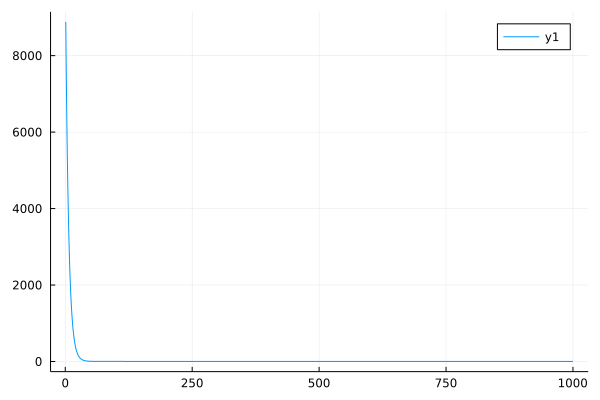

In [647]:
plot(1:length(best_fs), best_fs)

# 3.3b

In [472]:
include("projToSmplx.jl")

log_opt_return_sample (generic function with 1 method)

In [460]:
log_opt_return_sample(100)

10×100 Matrix{Float64}:
 1.48989  1.48641   1.48481   1.4818    …    1.49941  164.825      1.50615
 1.22797  1.21955   1.16572   1.27428        1.26541    1.18213    1.14071
 1.46675  1.49621   1.44915   1.56194        1.49382    1.40532    1.3892
 2.02498  2.04107   1.99299   2.07634        3.13046    1.96122    2.00531
 2.48035  2.49803   2.49605   2.55986        2.47391    8.45015    2.38735
 1.37059  1.401     1.4733    1.25323   …    1.23154    1.36927   80.1823
 2.50457  2.44834   2.4666   24.7393        24.5201     2.49105    2.49717
 1.6443   1.64002   1.66095   1.66667      492.277      1.64614  492.947
 1.6552   1.62029   1.68094   1.61189       66.6034     1.69899    1.68986
 1.05289  0.949496  1.0106    0.977168       1.09057    1.04586    2.03702

In [550]:
n = 10
num_iters = 1000
x = ones(n)

f(x) = mean(log.(log_opt_return_sample(Int(1e5))'*x))
α(params) = 1e-4
    
fs = []
f_bests = []
for i = 1:num_iters
    r = vec(log_opt_return_sample(1))
    g = r./(r⋅x)
    params = Dict("k"=>i)
    x += α(params).*g
    x = proj_simplex(x)
    push!(fs, f(x))
    push!(f_bests, maximum(fs))
end

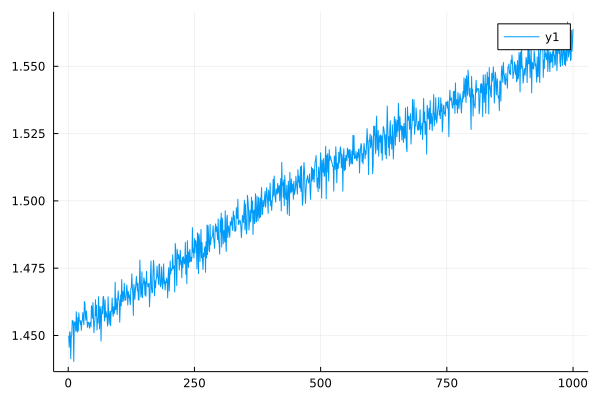

In [551]:
plot(1:length(fs), fs)

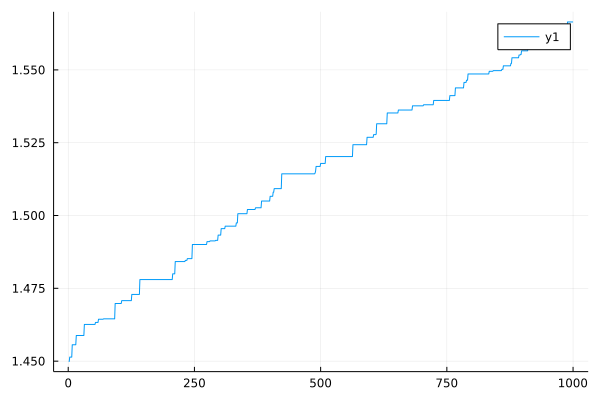

In [552]:
plot(1:length(f_bests), f_bests)

# 3.3c

In [553]:
n = 10
num_iters = 10000
x = 1/n*ones(n)
fs = []
f_bests = []
    
R = log_opt_return_sample(Int(1e5))
f(x) = mean(log.((R'*x)[R'*x .> 0]))
Π(x) = x - ((sum(x)-1)/n)*ones(n)
α(params) = 1e-4

for i = 1:num_iters
    r = vec(log_opt_return_sample(1))
    g = r./(r⋅x)
    params = Dict("k"=>i)
    x += α(params).*g
    x = Π(x)
    push!(fs, f(x))
    push!(f_bests, maximum(fs))
end
fs[end], maximum(fs)

(1.9893572046109258, 1.9893572046109258)

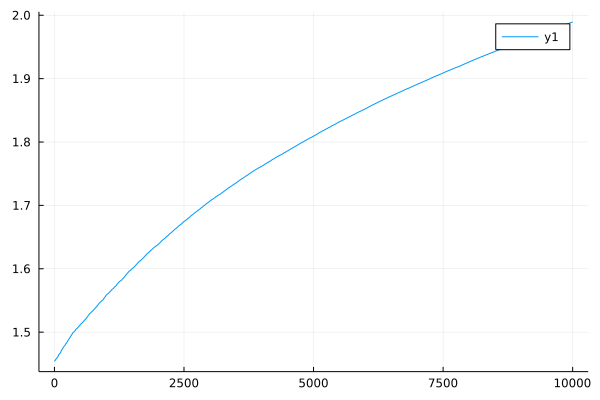

In [555]:
plot(1:length(fs), fs)

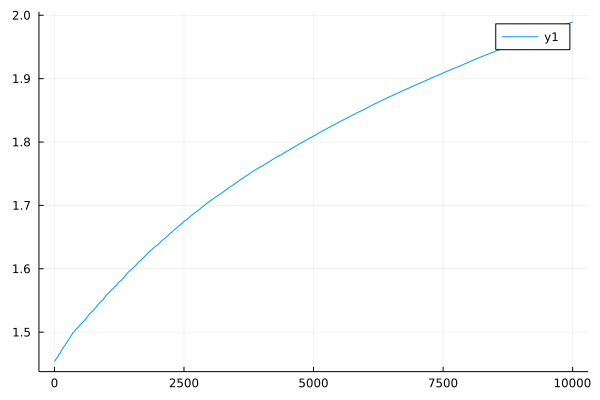

In [556]:
plot(1:length(f_bests), f_bests)